#                                                                    **Model Interpretability in NLP**




*It’s not enough to know if a model works, we need to know how it works: Sundar Pichai*


The emphasis today is slowly moving towards model interpretability rather than model predictions alone. The real essence of Interpretability, however, should be to make Machine learning models more understandable for humans and especially for those who don’t know much about machine learning. Machine Learning is a very powerful tool and with such power comes a responsibility to ensure that values like fairness are well reflected within the models. It is also important to ensure that the AI models do not reinforce the bias that exists in the real world

**Why is Interpretabilty important?**
<br>
•	Trustworthy models <br>
•	Human-readable explanations<br>
•	Better understand why the model miss-classifies training samples.<br>
•	Detect potential model bias.






Though these deep neural network models achieve impressive performance, it is relatively difficult to convince people to trust the predictions of such neural networks since they are actually black boxes for human beings . For instance, if an essay scoring system only tells the scores of a given essay without providing explicit reasons, the users can hardly be convinced of the judgment. Therefore, the ability to explain the rationale is essential for a NLP system, a need which requires traditional NLP models to provide human-readable explanations

# How? <br>

 **Generating Heatmaps to show where a model is focusing in on particular areas of the input text in order to make a classification.** 

 Heatmaps of Test input document is created which either highlights the most important words contributing to classification or ranks them according to their score as shown below


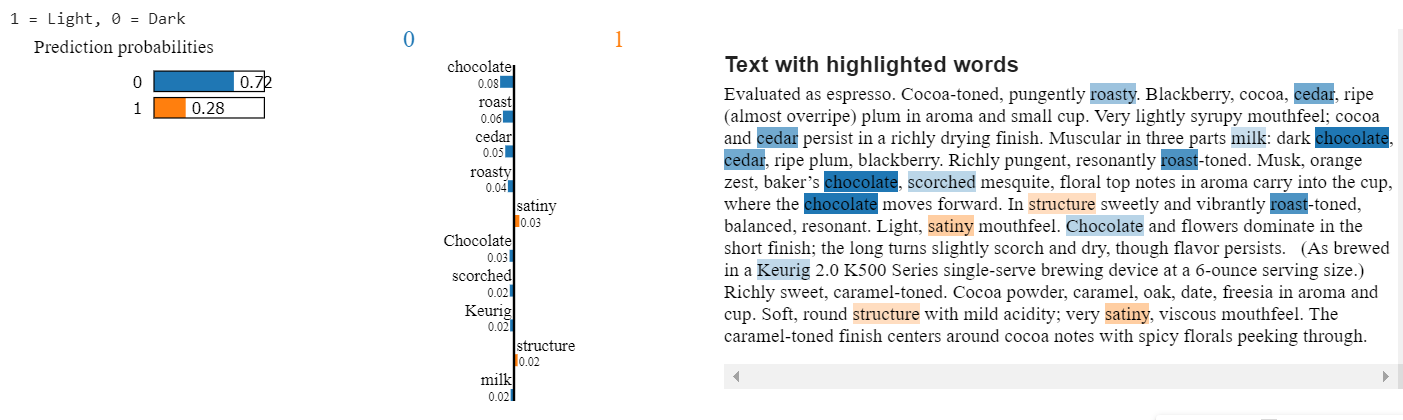


**Techniques used to generate heatmaps** <br>
1)	Gradient Explainer <br>
2)	Lime <br>
3)	Shap <br>



**Models from which heatmaps would be generated** <br>
•	Logistic regression with Lime <br>
•	Logistic regression with shap <br>
•	Gradient Explainer CNN <br>
•	Bert with Lime <br>




In [ ]:
from google.colab import files
uploaded = files.upload()


Saving coffeedata.csv to coffeedata.csv


# **About the Dataset:**

*  dataset is a series of coffee reviews
*  using blind tasting notes to try to predict whether the roast is light or dark <br>

link to download https://drive.google.com/open?id=17jYWjTHrwMegjdTYs0YLXyc9PDRLOSi1 <br> <br>
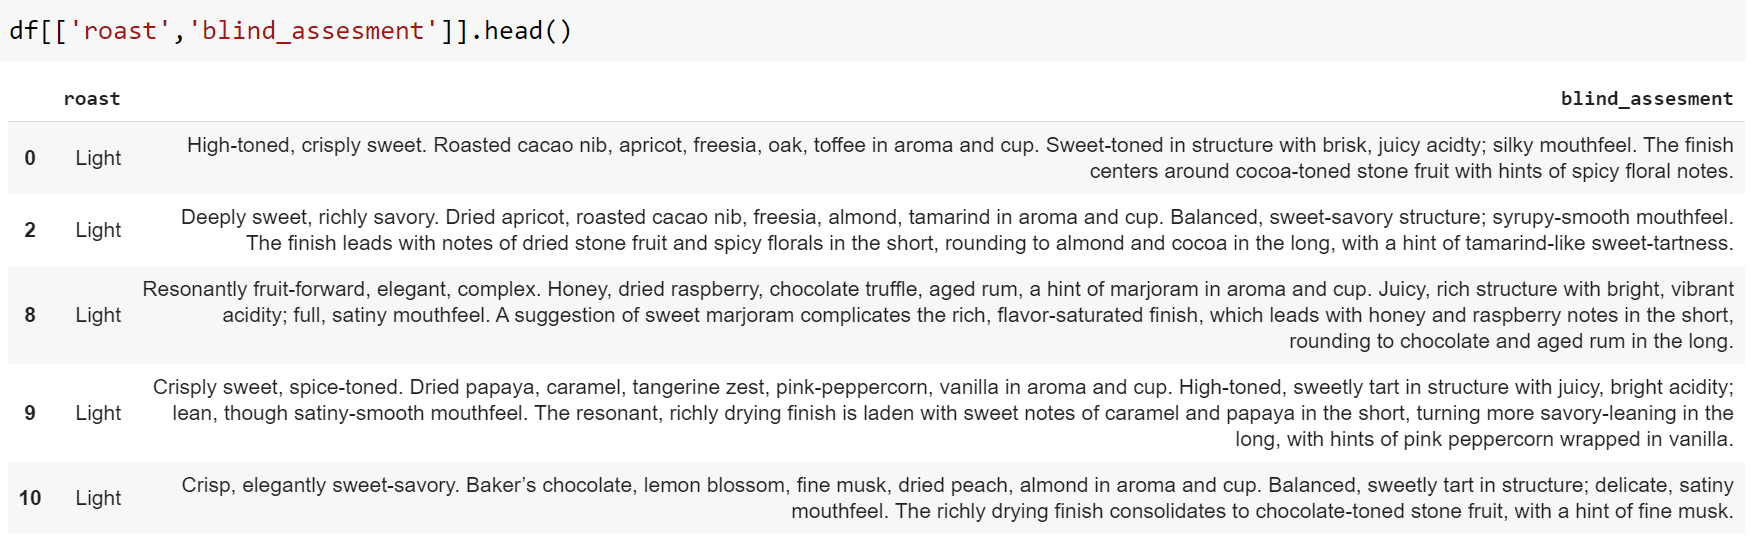

In [ ]:
df = pd.read_csv('coffeedata.csv') #from https://drive.google.com/open?id=17jYWjTHrwMegjdTYs0YLXyc9PDRLOSi1
#data clean:
df['light_dark'] = np.where(df.roast=='Very Dark','Dark',df.roast)
df = df.loc[(df.light_dark=='Dark')|(df.light_dark=='Light')]
df = df.loc[(df.blind_assesment.str.len()>10)]
df['y'] = np.where(df.light_dark=='Light',1,0)
df.light_dark.value_counts()

Light    384
Dark     151
Name: light_dark, dtype: int64

In [ ]:
df.head(2)

rating                company  ... light_dark  y
0  90.0    Coava Coffee Roasters  ...  Light      1
2  93.0    JBC Coffee Roasters    ...  Light      1

[2 rows x 16 columns]

In [ ]:
df[['roast','blind_assesment']].head()

roast                                                                                                                                                                                                                                                                                                                                                                                                     blind_assesment
0   Light  High-toned, crisply sweet. Roasted cacao nib, apricot, freesia, oak, toffee in aroma and cup. Sweet-toned in structure with brisk, juicy acidty; silky mouthfeel. The finish centers around cocoa-toned stone fruit with hints of spicy floral notes.                                                                                                                                                             
2   Light  Deeply sweet, richly savory. Dried apricot, roasted cacao nib, freesia, almond, tamarind in aroma and cup. Balanced, sweet-savory structure; syrupy-smooth mouthfeel. The finish leads with notes of dried stone fruit and spicy florals in the short, rounding to almond and cocoa in the long, with a hint of tamarind-like sweet-tartness.                                                                     
8   Light  Resonantly fruit-forward, elegant, complex. Honey, dried raspberry, chocolate truffle, aged rum, a hint of marjoram in aroma and cup. Juicy, rich structure with bright, vibrant acidity; full, satiny mouthfeel. A suggestion of sweet marjoram complicates the rich, flavor-saturated finish, which leads with honey and raspberry notes in the short, rounding to chocolate and aged rum in the long.          
9   Light  Crisply sweet, spice-toned. Dried papaya, caramel, tangerine zest, pink-peppercorn, vanilla in aroma and cup. High-toned, sweetly tart in structure with juicy, bright acidity; lean, though satiny-smooth mouthfeel. The resonant, richly drying finish is laden with sweet notes of caramel and papaya in the short, turning more savory-leaning in the long, with hints of pink peppercorn wrapped in vanilla. 
10  Light  Crisp, elegantly sweet-savory. Baker’s chocolate, lemon blossom, fine musk, dried peach, almond in aroma and cup. Balanced, sweetly tart in structure; delicate, satiny mouthfeel. The richly drying finish consolidates to chocolate-toned stone fruit, with a hint of fine musk.

# 1) **Gradient Explainer** <br>
Applying similar techniques as that of vision based CNNs are looking and apply this to text.We will then create a heatmap to show where a CNN is ‘focusing-in’ on particular areas of the input text in order to make a classification. 

In [ ]:
# Libraries needed to import
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import HTML
from sklearn.model_selection import train_test_split
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from keras.models import Model
from keras import backend as K 
from keras.models import Sequential
from keras import layers
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer


pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

 ## The link to the graident explainer notebook is https://colab.research.google.com/drive/1lR3AZnm-zCYlAgRmrz-bFJ5ly3AqiKpm?usp=sharing


The code to build a CNN in Keras and train it on this data is above. <br>
Below are the snippets of the code 

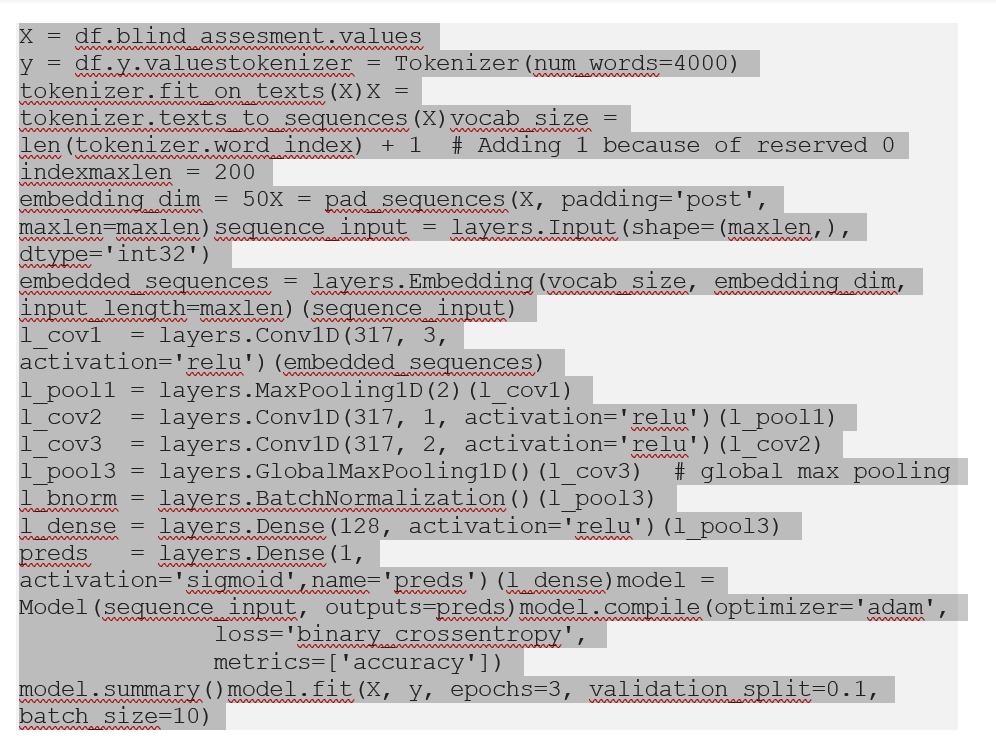

Creating a map of activations:
Using Keras this is quick and easy and requires only a few lines of code:
Get the model prediction and the final CNN layer of the network:

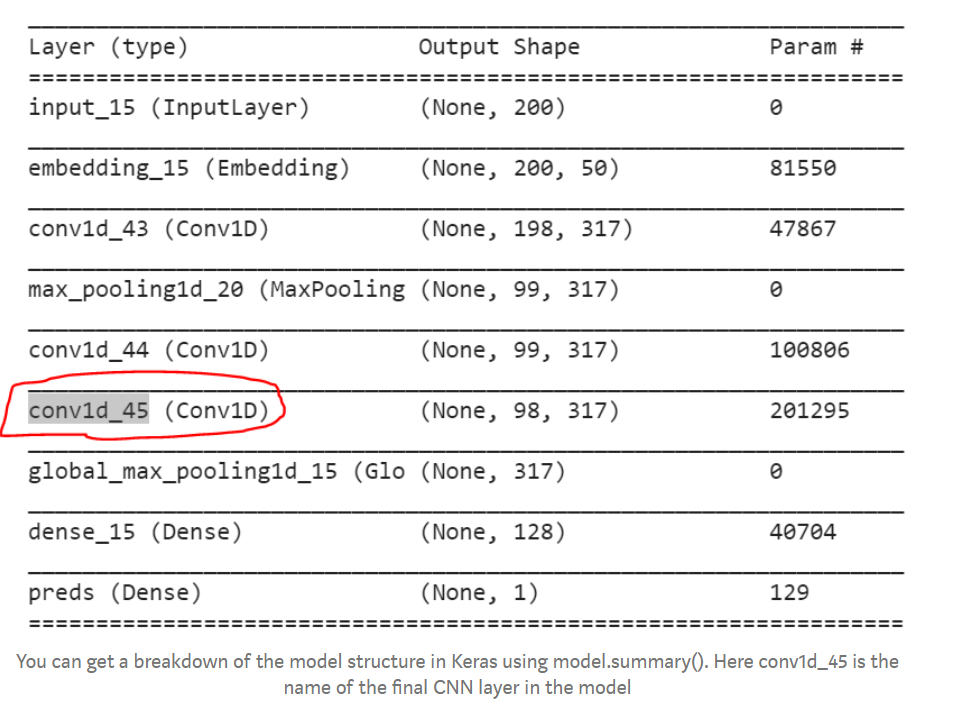

The following code then gets both the prediction class and also the last CNN layer:
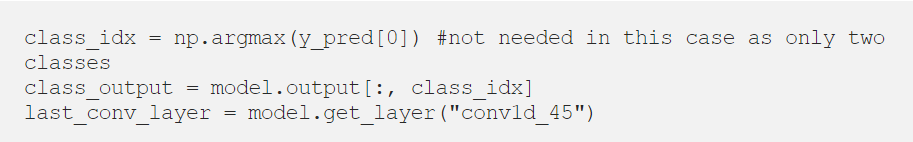

From this we can then compute the gradient of the class output with respect to the feature map and then pool all of the gradients. This sounds complicated but can be done in just a few lines of code using Keras back-end functions: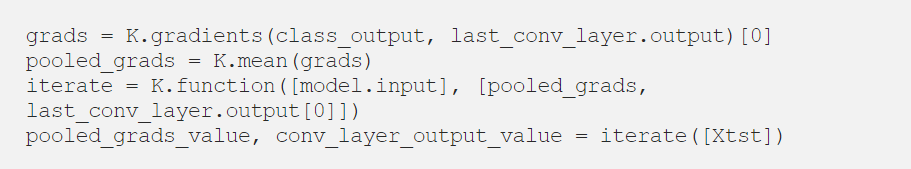

We then average this feature map and normalize it between 0 and 1:
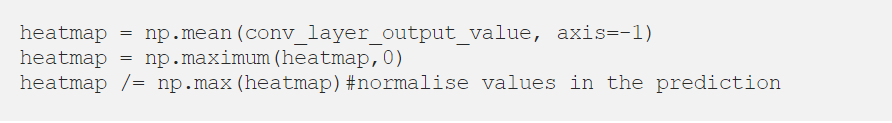

We now have a heatmap of activations for the predicted class over the length of the output shape of the last CNN layer. All we now need to do is to resize (stretch) this against the length of the original input (number of words) to get an understanding of which words have triggered the network.

Visualising the outputs with HTML: <br>
Adding some basic HTML to the final prediction can create a very impactful user interface whilst adding the ability to understand how the model has reached its prediction:
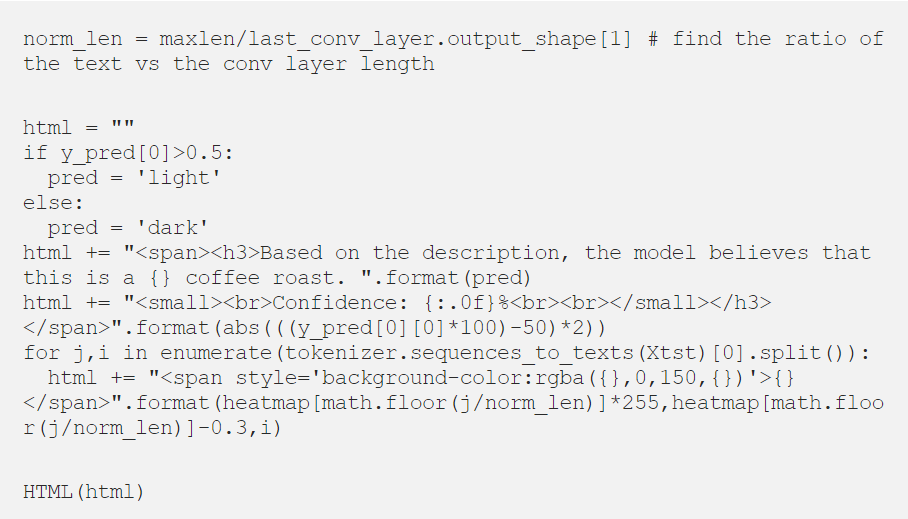

This HTML snippet creates the following output:
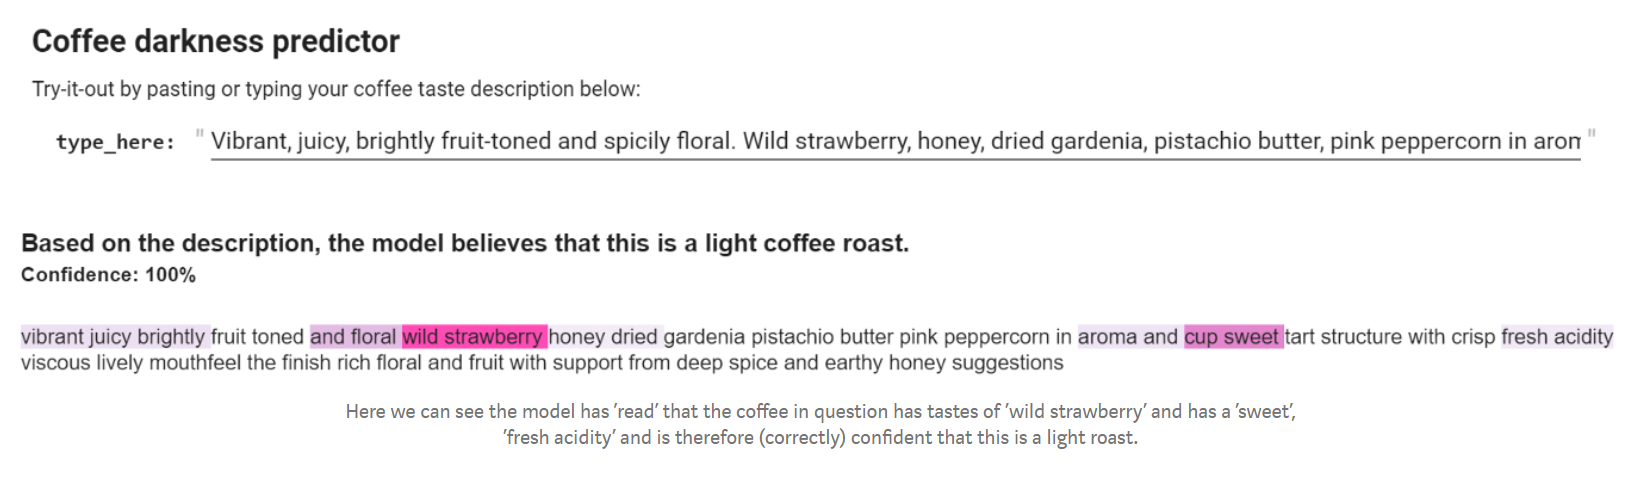

# 2) Lime with Logistic Regression Model

## What is Lime

As evident by the name, LIME is an interpretability surrogate model which can be used on any black-box model (model-agnostic) and provides interpretability for a single observation prediction (local).
LIME works in the following manner:
1.	First, you choose the single prediction which you would like explained
2.	LIME creates permutations of your data at this instance and collects the black-box model results
3.	it then gives weights to the new samples based on how closely they match the data of the original prediction
4.	a new, less complex, interpretable model is trained on the data variations created using the weights attached to each variation
5.	and finally, the prediction can be explained by this local interpretable model



## Implementation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics


In [ ]:
import lime
import sklearn.ensemble
# from __future__ import print_function
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

In [ ]:
X = df.blind_assesment.values
y = df.y.values

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# create bag-of-words with weights using tfid vectoriser
# strip accents and remove stop words during vectorisation
tf=TfidfVectorizer(strip_accents = 'ascii', stop_words='english')

# transform and fit the training set with vectoriser
X_train_tf = tf.fit_transform(X_train)
# transform the test set with vectoriser
X_test_tf = tf.transform(X_test)

# create logistic regression model
logreg = LogisticRegression(verbose=1, random_state=0, penalty='l2', solver='newton-cg')
# train model on  vectorised training data
model = logreg.fit(X_train_tf, y_train)
# evaluate model performance on the test set
pred = model.predict(X_test_tf)
metrics.f1_score(y_test, pred, average='weighted')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.9380930843617411

In [ ]:

# importing the libraries
import lime
import sklearn.ensemble
# from __future__ import print_function
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

# converting the vectoriser and model into a pipeline
# this is necessary as LIME takes a model pipeline as an input
c = make_pipeline(tf, model)

# saving a list of strings version of the X_test object
ls_X_test= list(X_test)

# saving the class names in a dictionary to increase interpretability
class_names = {0: 'Dark', 1:'Light'}

In [ ]:

# create the LIME explainer
# add the class names for interpretability
LIME_explainer = LimeTextExplainer(class_names=class_names)

# choose a random single prediction
idx = 90
# explain the chosen prediction 
# use the probability results of the logistic regression
# can also add num_features parameter to reduce the number of features explained
LIME_exp = LIME_explainer.explain_instance(ls_X_test[idx], c.predict_proba)
# print results
print('Document id: %d' % idx)
print('blind_assessment: ', ls_X_test[idx])
print('Prediction probability of Light Roast =', c.predict_proba([ls_X_test[idx]]).round(3)[0,1])
print('Prediction probability of Dark Roast =', 1- c.predict_proba([ls_X_test[idx]]).round(3)[0,1])
print('True class: %s' % class_names.get(list(y_test)[idx]))

/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


Document id: 90
blind_assessment:  Rich, sweet-toned, toasty aroma with soft hints of nut and cinnamon. Medium to full body with a delicately soft mouthfeel. Quite complex in the cup: toast, cedar, chocolate, raisin and flowers. The roasty dark chocolate persists into a rich, simple finish.
Prediction probability of Light Roast = 0.333
Prediction probability of Dark Roast = 0.667
True class: Dark


In [ ]:
# print class names to show what classes the viz refers to
print("1 = Light, 0 = Dark")
# show the explainability results with highlighted text
LIME_exp.show_in_notebook(text=True)

1 = Light, 0 = Dark


# 3) Shap with Logistic Regression Model

## What is SHAP (SHapley Additive exPlanation)

In order to understand SHAP, we need to first have a basic understanding of the Shapley value, a solution concept for cooperative game theory.
The Shapley value is calculated using the following mathematical equation:

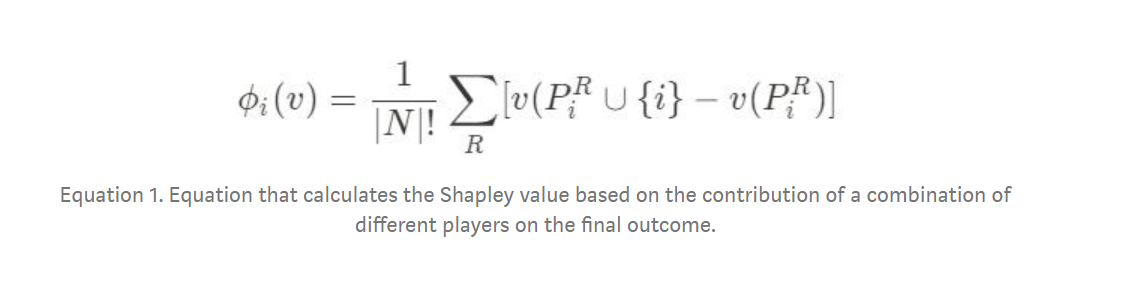

ϕ ᵢ(v): the Shapley value for a specific player
N: the number of players
v(P ∪ {i}): contribution of the set of players in order on the outcome, including player i
v(P): contribution of the set of players in order on the outcome (without player i)
R: the permutation of order of the players (there are N! permutations)

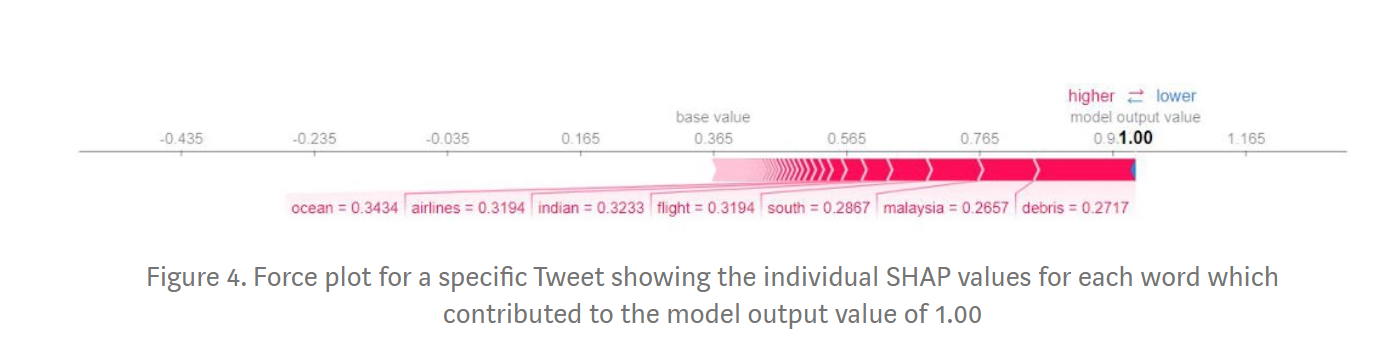

## Implementation

In [ ]:
# importing SHAP
import shap

# sampling data from the training and test set to reduce time-taken
X_train_sample = shap.sample(X_train_tf, 200)
X_test_sample = shap.sample(X_test_tf, 5)

# creating the KernelExplainer using the logistic regression model and training sample
SHAP_explainer = shap.KernelExplainer(model.predict, X_train_sample)
# calculating the shap values of the test sample using the explainer 
shap_vals = SHAP_explainer.shap_values(X_test_sample)

# converting the test samples to a dataframe 
# this is necessary for non-tabular data in order for the visualisations 
# to include feature value
colour_test = pd.DataFrame(X_test_sample.todense())

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


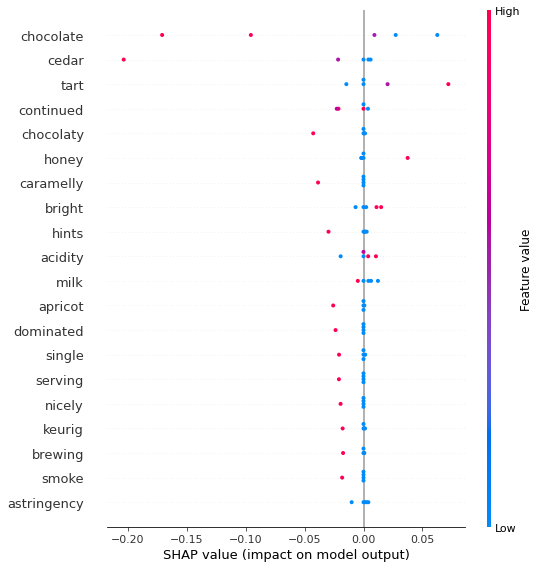

In [ ]:
shap.summary_plot(shap_vals, colour_test, feature_names=tf.get_feature_names())

The summary plot above shows the top 20 features based on their feature importance for the predictions. The SHAP value on the x-axis shows whether the feature effected a higher or lower prediction probability. Each dot represents a different test observation and the colour of the dot is how important that feature was for that particular prediction.

An individual force plot which shows the SHAP values for the specific features in a chosen prediction

In [ ]:

shap.force_plot(SHAP_explainer.expected_value, shap_vals[1,:], colour_test.iloc[1,:], feature_names=tf.get_feature_names())

# 4)Bert

## What is BERT?

BERT is a pre-trained unsupervised natural language processing model. BERT can outperform 11 of the most common NLP tasks after fine-tuning, essentially becoming a rocket booster for Natural Language Processing and Understanding.

BERT is deeply bi-directional, meaning it looks at the words before and after entities and context pre-trained on Wikipedia to provide a richer understanding of language.

## Why BERT

Traditionally computers have had an impossible time understanding language. They can store text, we can enter text, but the understanding of language has always been incredibly difficult for computers. So along comes natural language processing (NLP), the field in which researchers develop unique models to solve for specific types of language understanding. A couple of examples are; named entity recognition, classification, sentiment analysis, and question and answering. 

All of these have traditionally been solved by individual models fit to solve one specific language task and so it looks a little bit like your kitchen: 
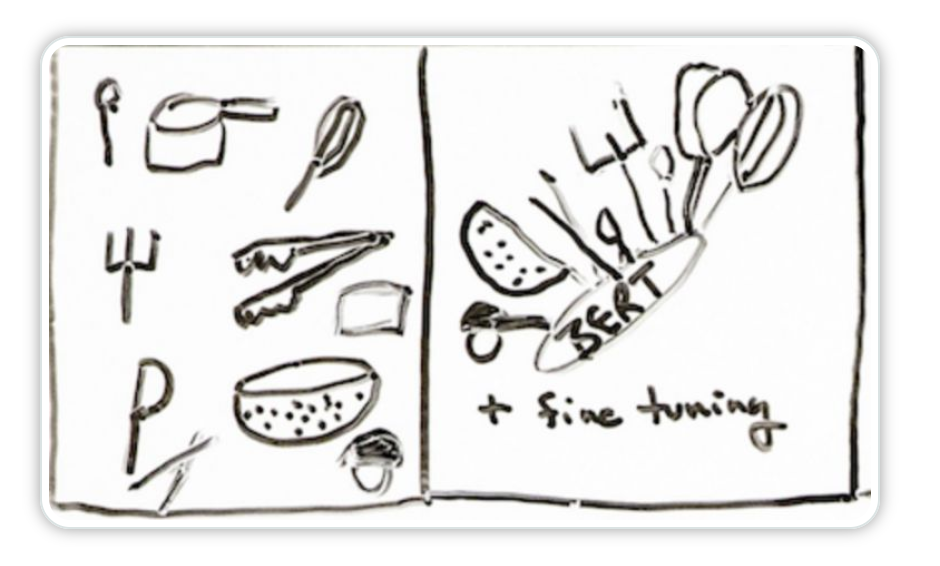

Think of the individual NLP models like utensils that you have in your kitchen, they all have one very specific task that they do very well. 

Now consider a be-all-end-all kitchen utensil that is 11 of your most frequently used utensils in one. This is BERT, the one kitchen utensil that does eleven of the top natural language processing solutions really, really well after it's fine-tuned. 

An exciting differentiation in the NLP space. That's why people are really excited about it because they are no longer require all the individual models.

**Hence, It is very important to get the model interpretabilty when BERT is used. In the below implementation, heatmaps from the BERT model is generated.**

## Implementation

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


Installing the Hugging Face Library

In [ ]:
!pip install transformers

     |████████████████████████████████| 778kB 5.5MB/s 
     |████████████████████████████████| 1.1MB 29.7MB/s 
     |████████████████████████████████| 890kB 19.2MB/s 
     |████████████████████████████████| 3.0MB 56.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=7915a9190fd9fc9ee225234504b0d55e5e7844dd066506d2a55ee2acda8ee191
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


BERT Tokenizer

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
sentences = df.blind_assesment.values
labels = df.y.values

Let's apply the tokenizer to one sentence just to see the output.


In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  High-toned, crisply sweet. Roasted cacao nib, apricot, freesia, oak, toffee in aroma and cup. Sweet-toned in structure with brisk, juicy acidty; silky mouthfeel. The finish centers around cocoa-toned stone fruit with hints of spicy floral notes.
Tokenized:  ['high', '-', 'toned', ',', 'crisp', '##ly', 'sweet', '.', 'roasted', 'ca', '##cao', 'ni', '##b', ',', 'apr', '##ico', '##t', ',', 'free', '##sia', ',', 'oak', ',', 'to', '##ffe', '##e', 'in', 'aroma', 'and', 'cup', '.', 'sweet', '-', 'toned', 'in', 'structure', 'with', 'brisk', ',', 'juicy', 'acid', '##ty', ';', 'silky', 'mouth', '##fe', '##el', '.', 'the', 'finish', 'centers', 'around', 'cocoa', '-', 'toned', 'stone', 'fruit', 'with', 'hints', 'of', 'spicy', 'floral', 'notes', '.']
Token IDs:  [2152, 1011, 27604, 1010, 15594, 2135, 4086, 1012, 28115, 6187, 20808, 9152, 2497, 1010, 19804, 11261, 2102, 1010, 2489, 8464, 1010, 6116, 1010, 2000, 16020, 2063, 1999, 23958, 1998, 2452, 1012, 4086, 1011, 27604, 1999, 3252, 200

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  High-toned, crisply sweet. Roasted cacao nib, apricot, freesia, oak, toffee in aroma and cup. Sweet-toned in structure with brisk, juicy acidty; silky mouthfeel. The finish centers around cocoa-toned stone fruit with hints of spicy floral notes.
Token IDs: [101, 2152, 1011, 27604, 1010, 15594, 2135, 4086, 1012, 28115, 6187, 20808, 9152, 2497, 1010, 19804, 11261, 2102, 1010, 2489, 8464, 1010, 6116, 1010, 2000, 16020, 2063, 1999, 23958, 1998, 2452, 1012, 4086, 1011, 27604, 1999, 3252, 2007, 28022, 1010, 28900, 5648, 3723, 1025, 18848, 2677, 7959, 2884, 1012, 1996, 3926, 6401, 2105, 22940, 1011, 27604, 2962, 5909, 2007, 20385, 1997, 25482, 18686, 3964, 1012, 102]


maximum sentence length in our dataset

In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  178


In [ ]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 180 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 178...
MAX_LEN = 180

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 180 values...

Padding token: "[PAD]", ID: 0

Done.


In [ ]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [ ]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)

In [ ]:
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...

  Average training loss: 0.50
  Training epoch took: 0:00:14

Running Validation...
  Accuracy: 0.68
  Validation took: 0:00:01

======== Epoch 2 / 4 ========
Training...

  Average training loss: 0.38
  Training epoch took: 0:00:13

Running Validation...
  Accuracy: 0.85
  Validation took: 0:00:01

======== Epoch 3 / 4 ========
Training...

  Average training loss: 0.24
  Training epoch took: 0:00:14

Running Validation...
  Accuracy: 0.92
  Validation took: 0:00:01

======== Epoch 4 / 4 ========
Training...

  Average training loss: 0.23
  Training epoch took: 0:00:14

Running Validation...
  Accuracy: 0.90
  Validation took: 0:00:01

Training complete!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


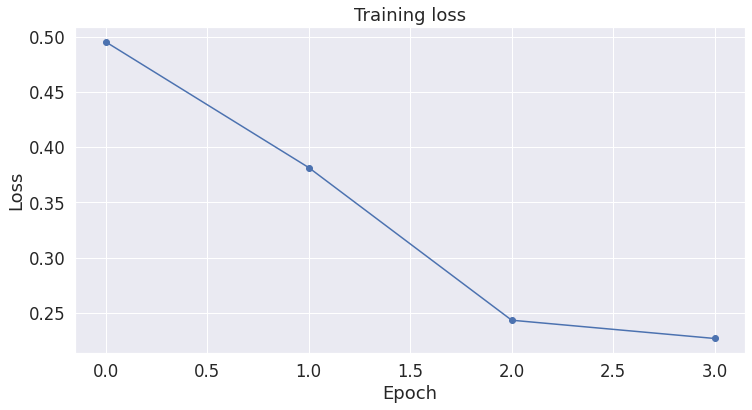

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
from transformers import TFBertForSequenceClassification, BertTokenizer
import tensorflow as tf

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

X = df.blind_assesment.values
y = df.y.values
X = list(map(tokenizer.tokenize, X))
X = list(map(tokenizer.convert_tokens_to_ids, X))
X_train, X_test, y_train, y_test = train_test_split(X, y)

train_dataset = tf.data.Dataset.from_tensor_slices((
    tf.ragged.constant(X_train, dtype=tf.int64).to_tensor(),
    tf.one_hot(y_train, depth=2, dtype=tf.int64)
)).shuffle(1000).batch(16)
test_dataset = tf.data.Dataset.from_tensor_slices((
    tf.ragged.constant(X_test, dtype=tf.int64).to_tensor(),
    tf.one_hot(y_test, depth=2, dtype=tf.int64)
)).shuffle(1000).batch(16)

model = TFBertForSequenceClassification.from_pretrained('bert-base-cased')
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.fit(train_dataset, epochs=10)

print(model.evaluate(test_dataset))

Some weights of the model checkpoint at bert-base-cased were not used when initializing TFBertForSequenceClassification: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier', 'dropout_37']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
26/26 [==============================] - 16s 604ms/step - loss: 0.5923 - accuracy: 0.7007
Epoch 2/10
26/26 [==============================] - 16s 610ms/step - loss: 0.5806 - accuracy: 0.7257
Epoch 3/10
26/26 [==============================] - 16s 616ms/step - loss: 0.5857 - accuracy: 0.7257
Epoch 4/10
26/26 [==============================] - 16s 620ms/step - loss: 0.5595 - accuracy: 0.7257
Epoch 5/10
26/26 [==============================] - 16s 625ms/step - loss: 0.5215 - accuracy: 0.7382
Epoch 6/10
26/26 [==============================] - 16s 630ms/step - loss: 0.5760 - accuracy: 0.6808
Epoch 7/10
26/26 [==============================] - 16s 635ms/step - loss: 0.4364 - accuracy: 0.8130
Epoch 8/10
26/26 [==============================] - 17s 635ms/step - loss: 0.3807 - accuracy: 0.8504
Epoch 9/10
26/26 [==============================] - 17s 637ms/step - loss: 0.3796 - accuracy: 0.8105
Epoch 10/10
9/9 [==============================] - 1s 157ms/step - loss: 0.3797 - accuracy:

In [ ]:
type_here="Evaluated as espresso. Cocoa-toned, pungently roasty. Blackberry, cocoa, cedar, ripe (almost overripe) plum in aroma and small cup. Very lightly syrupy mouthfeel; cocoa and cedar persist in a richly drying finish. Muscular in three parts milk: dark chocolate, cedar, ripe plum, blackberry. Richly pungent, resonantly roast-toned. Musk, orange zest, baker’s chocolate, scorched mesquite, floral top notes in aroma carry into the cup, where the chocolate moves forward. In structure sweetly and vibrantly roast-toned, balanced, resonant. Light, satiny mouthfeel. Chocolate and flowers dominate in the short finish; the long turns slightly scorch and dry, though flavor persists.   (As brewed in a Keurig 2.0 K500 Series single-serve brewing device at a 6-ounce serving size.) Richly sweet, caramel-toned. Cocoa powder, caramel, oak, date, freesia in aroma and cup. Soft, round structure with mild acidity; very satiny, viscous mouthfeel. The caramel-toned finish centers around cocoa notes with spicy florals peeking through. "

In [ ]:
import lime
from lime.lime_text import LimeTextExplainer

def bert_predict_proba(xx):
    ds = [tokenizer.convert_tokens_to_ids(tokenizer.tokenize(x)) for x in xx]
    ds = tf.ragged.constant(ds, dtype=tf.int64).to_tensor().numpy()
    pred = model.predict(ds, batch_size=32, verbose=1)[0]
    return tf.nn.sigmoid(pred).numpy()

class_names = {0: 'Dark', 1:'Light'}
LIME_explainer = LimeTextExplainer(class_names=class_names)
LIME_exp = LIME_explainer.explain_instance(type_here, bert_predict_proba)
LIME_exp.show_in_notebook(text=True)

/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


157/157 [==============================] - 99s 631ms/step


# Conclusion

 Generated Heatmaps of Text using different techniques and Models. Heatmaps will help us in model Interpretabilty in NLP by looking on particular areas of the input text in order to make a classification. Created the heatmaps from BERT model which is extensively used in almost all NLP task giving a better performance.

Citations <br>
•	https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/ <br>
•	https://towardsdatascience.com/deconstructing-bert-distilling-6-patterns-from-100-million-parameters-b49113672f77 <br>
•	https://arxiv.org/pdf/1808.03894.pdf <br>
•	https://arxiv.org/pdf/1908.04626.pdf <br>
•	https://arxiv.org/abs/1811.00196 <br>
•	https://arxiv.org/pdf/1908.05620.pdf <br>
•	https://www.aclweb.org/anthology/W16-1601.pdf <br>
•	https://www.aclweb.org/anthology/N16-1082.pdf <br>


